In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn, optim, utils
%matplotlib inline

Создадим генератор данных. Признаки сконкатинируем с целевым признаком

In [91]:
np.random.seed(42)
def create_dataset(object_count=10000, features_size=500) -> np.array:
    X = torch.empty(object_count, features_size).uniform_(0, 1)
    y = X.mean(dim=1)
    return torch.cat((X, y.view(-1, 1)), dim=1)

In [92]:
train_dataset = create_dataset()
train_dataset.shape

(torch.Size([10000, 501]), torch.Size([1000, 501]))

Создадим простую нейронную сеть состоящую из 2х линейных слоев

In [101]:
in_size = 500
hid_size = 100
out_size = 1

model = nn.Sequential(nn.Linear(in_size, hid_size),
                      nn.ReLU(),
                      nn.Linear(hid_size, out_size))

Оптимизировать будем стахостическим градиентным спуском (stochastic gradient descent)

Лосс-функция - среднее квадратичное отклонение (mean squared error)

In [102]:
learning_rate = 1e-2
epoch_count = 50
batch_size = 500

optimizer = optim.SGD(params=model.parameters(), lr=learning_rate)
loss_func = nn.MSELoss()
dataloader = utils.data.DataLoader(dataset=train_dataset, batch_size=500, shuffle=True)

In [132]:
loss_history = []

model.train()
for epoch in range(epoch_count):
    epoch_loss = 0
    for batch_number, batch in enumerate(dataloader):
        X, y = batch[:,:-1], batch[:, [-1]]
        predicted = model(X)
        loss = loss_func(predicted, y)
        epoch_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    loss_history.append(epoch_loss / (batch_number + 1))

    print(f'Epoch {epoch}: Loss = {loss_history[-1]:.6f}')

Epoch 0: Loss = 0.001054
Epoch 1: Loss = 0.001040
Epoch 2: Loss = 0.001027
Epoch 3: Loss = 0.001014
Epoch 4: Loss = 0.001002
Epoch 5: Loss = 0.000990
Epoch 6: Loss = 0.000978
Epoch 7: Loss = 0.000966
Epoch 8: Loss = 0.000954
Epoch 9: Loss = 0.000943
Epoch 10: Loss = 0.000932
Epoch 11: Loss = 0.000922
Epoch 12: Loss = 0.000911
Epoch 13: Loss = 0.000901
Epoch 14: Loss = 0.000891
Epoch 15: Loss = 0.000881
Epoch 16: Loss = 0.000871
Epoch 17: Loss = 0.000862
Epoch 18: Loss = 0.000852
Epoch 19: Loss = 0.000843
Epoch 20: Loss = 0.000834
Epoch 21: Loss = 0.000826
Epoch 22: Loss = 0.000817
Epoch 23: Loss = 0.000809
Epoch 24: Loss = 0.000801
Epoch 25: Loss = 0.000792
Epoch 26: Loss = 0.000784
Epoch 27: Loss = 0.000776
Epoch 28: Loss = 0.000769
Epoch 29: Loss = 0.000761
Epoch 30: Loss = 0.000754
Epoch 31: Loss = 0.000747
Epoch 32: Loss = 0.000740
Epoch 33: Loss = 0.000733
Epoch 34: Loss = 0.000727
Epoch 35: Loss = 0.000720
Epoch 36: Loss = 0.000713
Epoch 37: Loss = 0.000707
Epoch 38: Loss = 0.000

Сгенерируем тестовый набор, получим предсказания посчитаем ошибку

In [133]:
test_dataset = create_dataset(100)
X, y = test_dataset[:,: -1], test_dataset[:, [-1]]
predicted = model(X)
loss = loss_func(predicted, y)
print(loss.item())

0.0006346179288811982


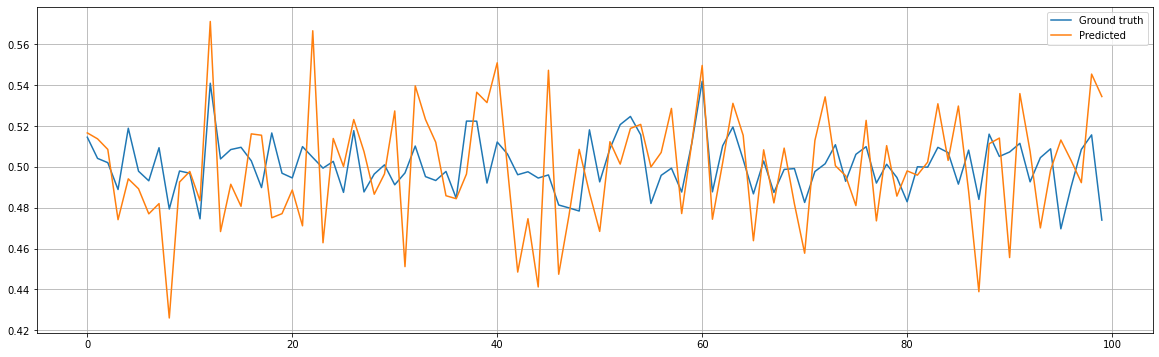

In [134]:
plt.figure(figsize=(20, 6))
plt.plot(range(y.shape[0]), y.numpy(), label='Ground truth');
plt.plot(range(y.shape[0]), predicted.detach().numpy(), label='Predicted');
plt.legend()
plt.grid()
plt.show()